In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,BatchNormalization,Activation,Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
epoch=5
batch_size=3
image_size=(300,300)

In [27]:
train_path='C:\\Users\\PCPC\\Desktop\\Defect\\Training'
test_path='C:\\Users\\PCPC\\Desktop\\Defect\\Test'

In [28]:
train_img_path=glob(train_path+'\\*\\*.jp*g')
test_img_path=glob(test_path+'\\*\\*.jp*g')
folders=glob(train_path+'\\*')

In [29]:
gen=ImageDataGenerator(
    rotation_range=0.9, 
    zoom_range=0.2,
    horizontal_flip=True, 
    vertical_flip=True
)

In [30]:
train_gen=gen.flow_from_directory(
    train_path, 
    target_size=(300, 300), 
    color_mode='rgb',
    class_mode='categorical', 
    batch_size=20, 
    shuffle=True, 
    seed=101
)



Found 81 images belonging to 2 classes.


In [31]:
test_gen=gen.flow_from_directory(
    test_path,
    target_size=(300,300),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=3,
    shuffle=True,
    seed=101
)

Found 19 images belonging to 2 classes.


In [34]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(300,300,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(64,(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#model.add(Dense(100,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(20,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 298, 298, 32)      128       
_________________________________________________________________
activation_7 (Activation)    (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 147, 147, 32)      128       
_________________________________________________________________
activation_8 (Activation)    (None, 147, 147, 32)      0         
__________

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
hist=model.fit_generator(
    generator=train_gen,
    steps_per_epoch=81//10,
    epochs=10,
    validation_data=test_gen,
    validation_steps=6
)

Epoch 1/10
8/8 [==============================] - 5s 573ms/step - loss: 2.3487 - acc: 0.7090 - val_loss: 3.5623 - val_acc: 0.7778
Epoch 2/10
8/8 [==============================] - 5s 637ms/step - loss: 4.1310 - acc: 0.7422 - val_loss: 4.0076 - val_acc: 0.7500
Epoch 3/10
8/8 [==============================] - 4s 493ms/step - loss: 2.2805 - acc: 0.8577 - val_loss: 2.0038 - val_acc: 0.8750
Epoch 4/10
8/8 [==============================] - 5s 634ms/step - loss: 2.6114 - acc: 0.8351 - val_loss: 5.0094 - val_acc: 0.6875
Epoch 5/10
8/8 [==============================] - 4s 527ms/step - loss: 3.8689 - acc: 0.7587 - val_loss: 2.0038 - val_acc: 0.8750
Epoch 6/10
8/8 [==============================] - 4s 526ms/step - loss: 2.2825 - acc: 0.8577 - val_loss: 3.0057 - val_acc: 0.8125
Epoch 7/10
8/8 [==============================] - 5s 594ms/step - loss: 2.1355 - acc: 0.8668 - val_loss: 4.0076 - val_acc: 0.7500
Epoch 8/10
8/8 [==============================] - 4s 544ms/step - loss: 2.4878 - acc: 0.84

Text(0.5,1,'Batch Size=35 \n(16,32,64) Conv \n (30,10,3) Dense\n Adam 0.001')

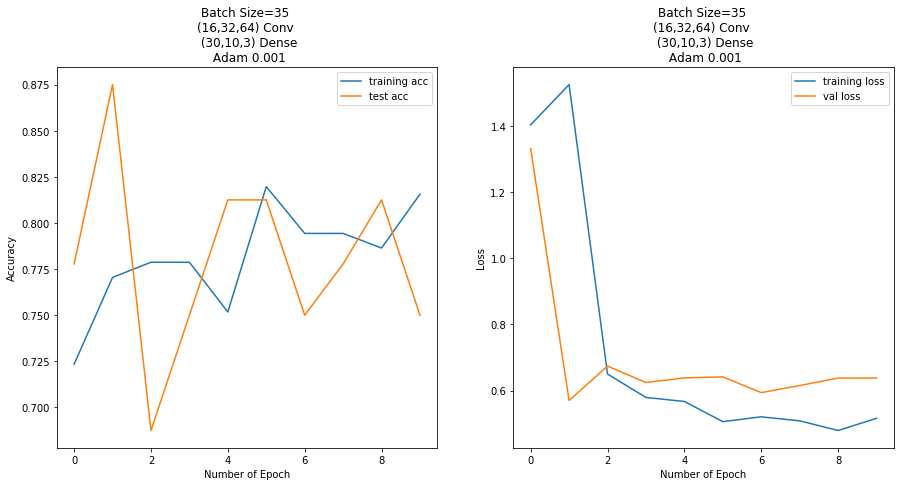

In [30]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.title('Batch Size=35 \n(16,32,64) Conv \n (30,10,3) Dense\n Adam 0.001')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')
plt.title('Batch Size=35 \n(16,32,64) Conv \n (30,10,3) Dense\n Adam 0.001')

Text(0.5,1,'Batch Size=35 \n(16,32,64) Conv \n (30,10,3) Dense\n Adam 0.001')

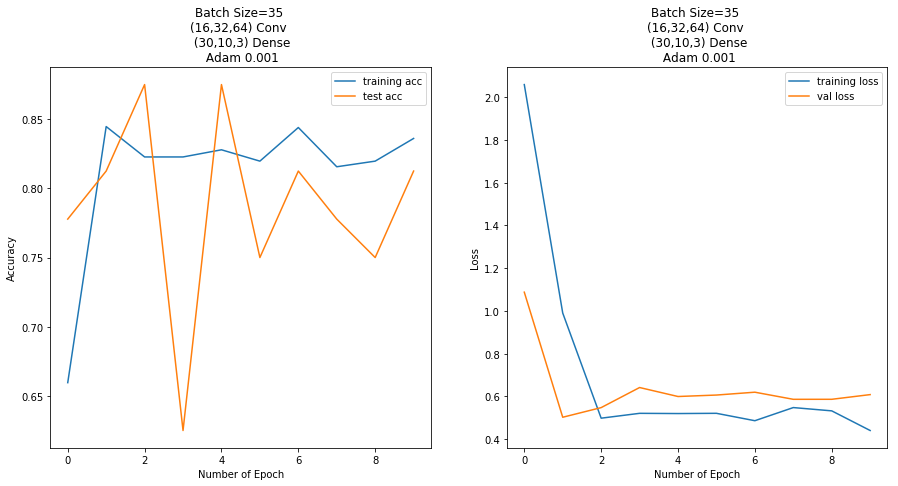

In [25]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.title('Batch Size=35 \n(16,32,64) Conv \n (30,10,3) Dense\n Adam 0.001')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')
plt.title('Batch Size=35 \n(16,32,64) Conv \n (30,10,3) Dense\n Adam 0.001')

In [38]:
layer_outputs=[layer.output for layer in model.layers[:12]]

In [39]:
from keras import models
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

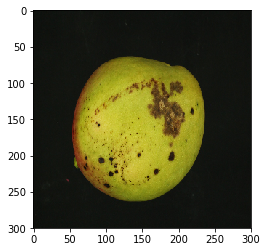

In [47]:
from keras.preprocessing import image
img_path = 'C:\\Users\\PCPC\\Desktop\\Defect\\Test\\Defect\\Mango_45_A.JPG'
img = image.load_img(img_path, target_size=(300, 300))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()

In [48]:
activations = activation_model.predict(img_tensor) 
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 298, 298, 32)


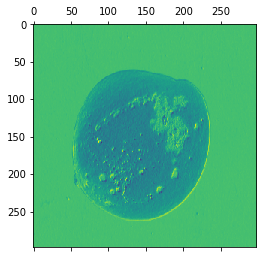

In [49]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


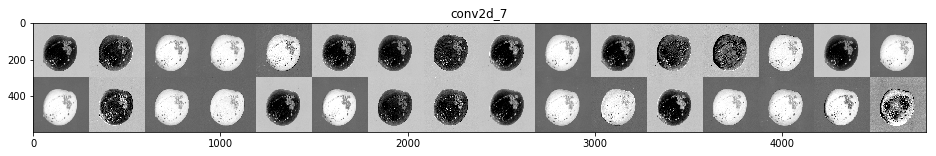

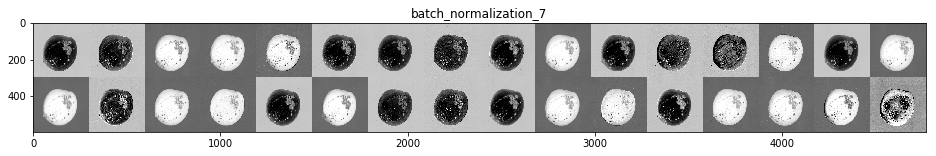

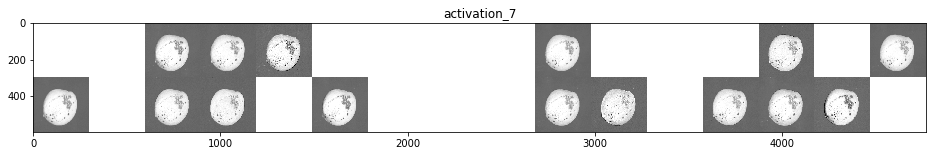

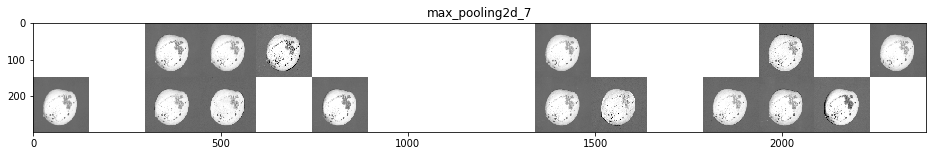

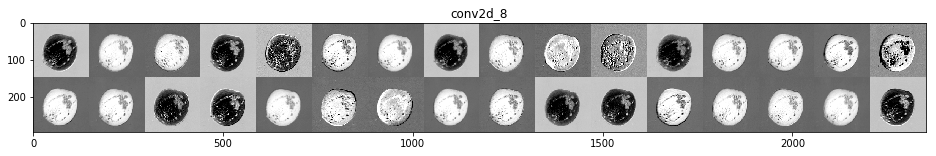

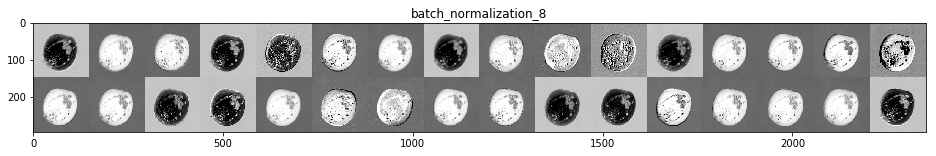

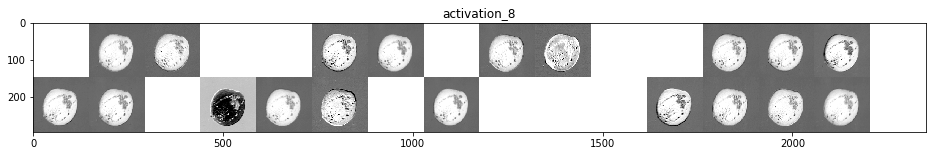

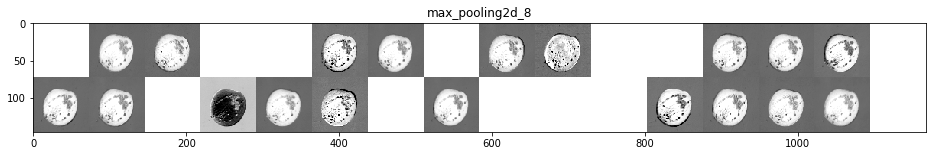

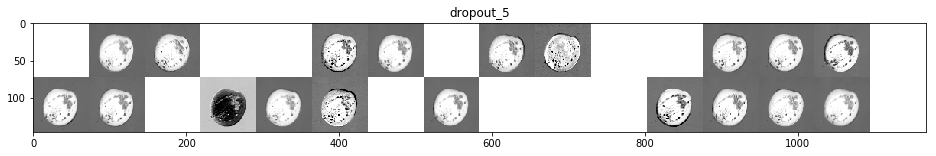

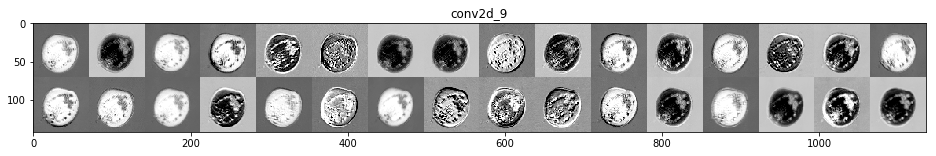

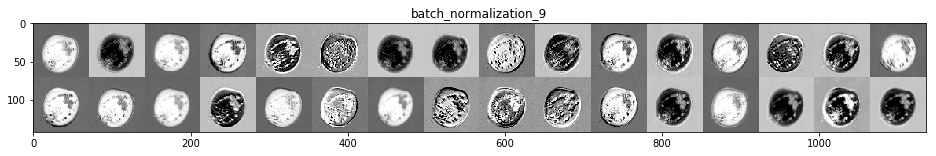

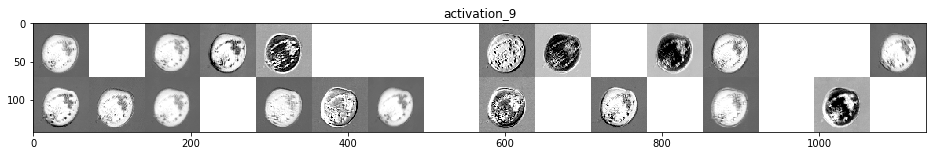

In [50]:
layer_names = []
for layer in model.layers[:13]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='Greys')

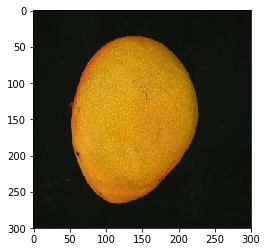

In [51]:
from keras.preprocessing import image
img_path = 'C:\\Users\\PCPC\\Desktop\\Defect\\Test\\Clean\\Mango_20_B.JPG'
img = image.load_img(img_path, target_size=(300, 300))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()

In [52]:
activations = activation_model.predict(img_tensor) 
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 298, 298, 32)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


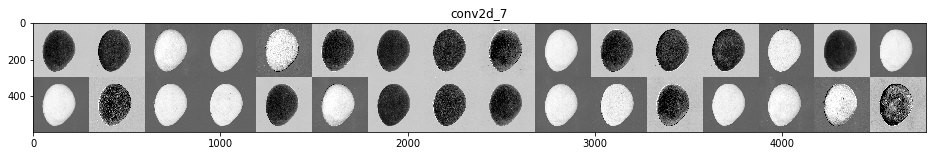

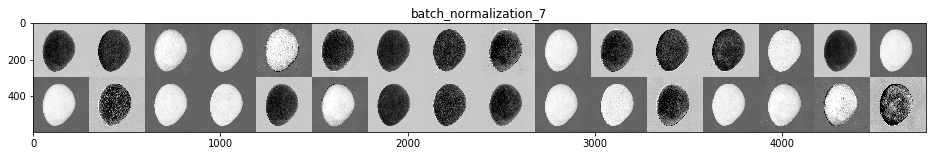

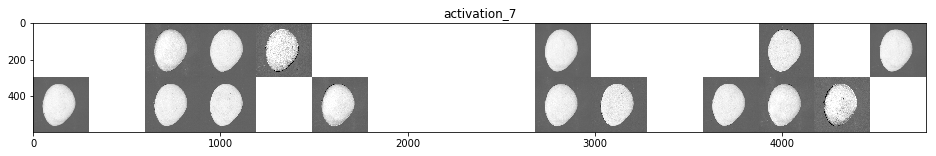

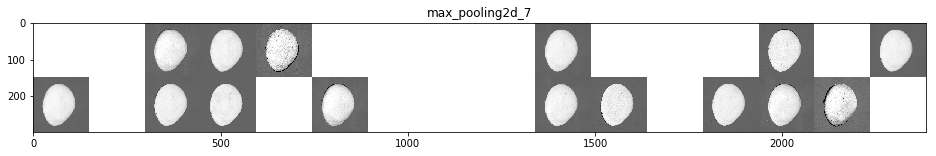

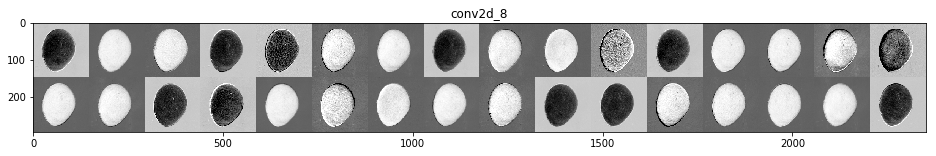

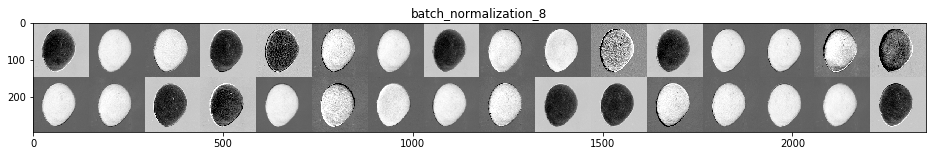

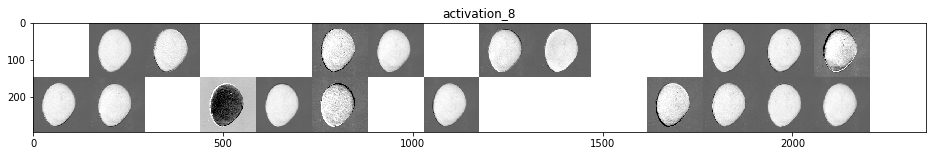

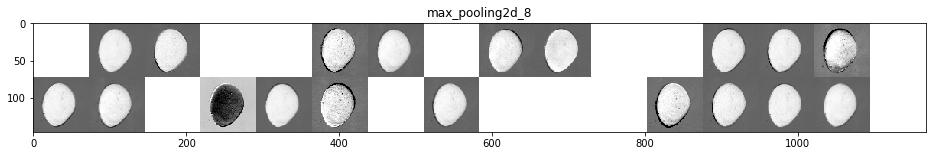

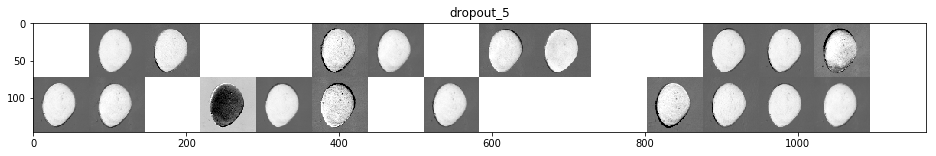

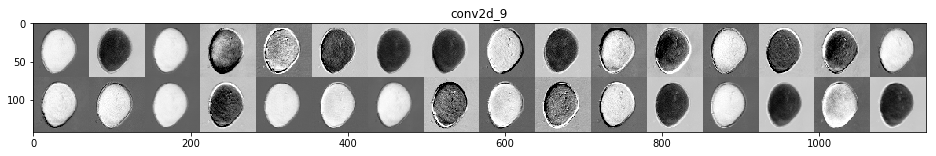

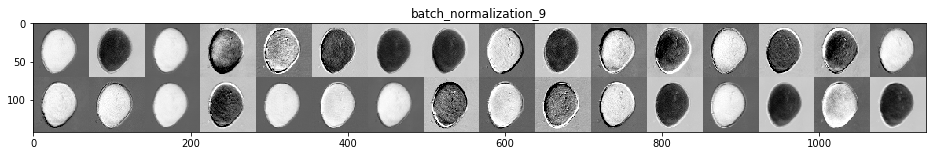

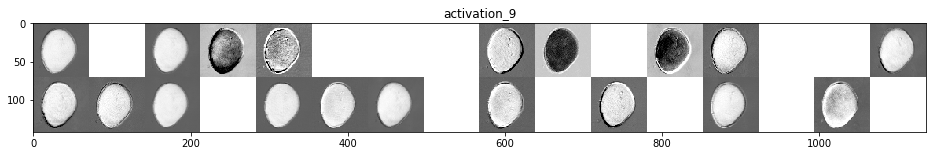

In [53]:
layer_names = []
for layer in model.layers[:13]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='Greys')